<a href="https://colab.research.google.com/github/amanjain487/panoptic-segmentation-using-DETR/blob/main/Train_Bounding_Box_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Train Model for Object Detection

## Get CUDA Device Properties

In [ ]:
import time
import glob
import torch
import os

from IPython.display import Image
print(torch.cuda.get_device_properties(0))


_CudaDeviceProperties(name='Tesla P100-PCIE-16GB', major=6, minor=0, total_memory=16280MB, multi_processor_count=56)


# Mount Drive
- To continue training from last checkpoint
- To save model after every epoch

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


# Install Required Libraries/Packages

In [ ]:
!pip install git+https://github.com/cocodataset/panopticapi.git

  Cloning https://github.com/cocodataset/panopticapi.git to /tmp/pip-req-build-01lxx67r
  Running command git clone -q https://github.com/cocodataset/panopticapi.git /tmp/pip-req-build-01lxx67r
  Created wheel for panopticapi: filename=panopticapi-0.1-py3-none-any.whl size=8306 sha256=3e1888bcab21406e62c97bc380e6510f05f478bc75fc9d5be7e6c855b3e05f3f
  Stored in directory: /tmp/pip-ephem-wheel-cache-empzs1y5/wheels/ad/89/b8/b66cce9246af3d71d65d72c85ab993fd28e7578e1b0ed197f1
Successfully built panopticapi


In [ ]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
device

device(type='cuda')

# Train Box Model

In [ ]:
import os
os.chdir("/content/drive/MyDrive/Panoptic Segmentation using DETR/detr")

!python main.py --coco_path ../data/  --coco_panoptic_path ../data/ --dataset_file coco_panoptic --output_dir "/content/drive/MyDrive/Panoptic Segmentation using DETR/detr/output/box_model"  --epoch 400 --batch_size 2 --resume "/content/drive/MyDrive/Panoptic Segmentation using DETR/detr/output/box_model/checkpoint.pth"

Streaming output truncated to the last 5000 lines.
Epoch: [392]  [ 250/5065]  eta: 0:23:09  lr: 0.000100  class_error: 0.00  loss: 2.3145 (3.7453)  loss_ce: 0.0747 (0.1865)  loss_bbox: 0.1672 (0.2134)  loss_giou: 0.1527 (0.1859)  loss_ce_0: 0.1161 (0.2570)  loss_bbox_0: 0.1921 (0.2425)  loss_giou_0: 0.1167 (0.2075)  loss_ce_1: 0.0956 (0.2223)  loss_bbox_1: 0.1663 (0.2261)  loss_giou_1: 0.1163 (0.1944)  loss_ce_2: 0.0795 (0.2174)  loss_bbox_2: 0.1574 (0.2160)  loss_giou_2: 0.1209 (0.1897)  loss_ce_3: 0.0661 (0.1945)  loss_bbox_3: 0.1555 (0.2163)  loss_giou_3: 0.1529 (0.1883)  loss_ce_4: 0.0661 (0.1924)  loss_bbox_4: 0.1588 (0.2112)  loss_giou_4: 0.1312 (0.1841)  loss_ce_unscaled: 0.0747 (0.1865)  class_error_unscaled: 0.0000 (5.9155)  loss_bbox_unscaled: 0.0334 (0.0427)  loss_giou_unscaled: 0.0764 (0.0929)  cardinality_error_unscaled: 0.5000 (1.1594)  loss_ce_0_unscaled: 0.1161 (0.2570)  loss_bbox_0_unscaled: 0.0384 (0.0485)  loss_giou_0_unscaled: 0.0584 (0.1037)  cardinality_error_0_un

In [ ]:
os.chdir("/content/drive/MyDrive/Panoptic Segmentation using DETR/detr")

from util.plot_utils import plot_logs

from pathlib import Path

log_directory = [Path('output/box_model/')]

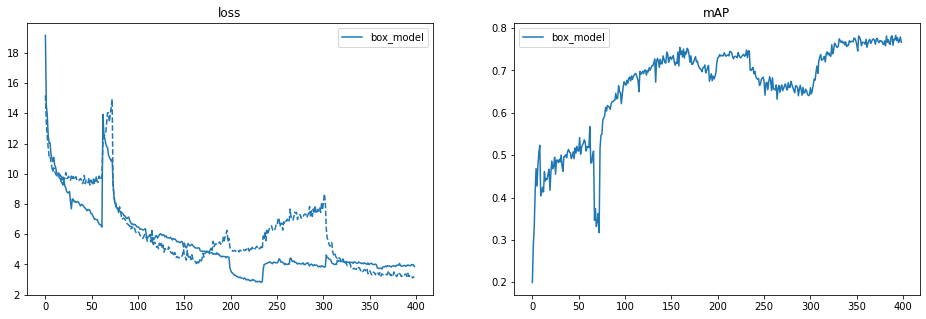

In [ ]:
fields_of_interest = (
    'loss',
    'mAP',
    )

plot_logs(log_directory,
          fields_of_interest)

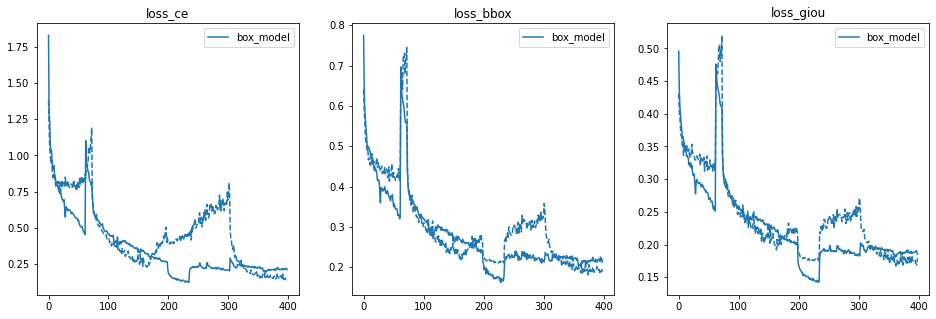

In [ ]:
fields_of_interest = (
    'loss_ce',
    'loss_bbox',
    'loss_giou',
    )
 
plot_logs(log_directory,
          fields_of_interest)

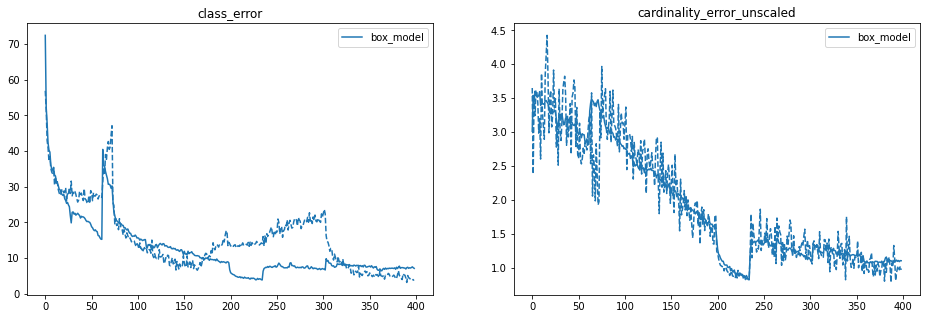

In [ ]:
fields_of_interest = (
    'class_error',
    'cardinality_error_unscaled',
    )

plot_logs(log_directory,
          fields_of_interest)   